**Here I am using the dataset only for assignment purpose. I am going to predict the price of the car using Linear Regression algorithm.**

## Used car Price Prediction

- This dataset contains information about used cars.

- Details of dataset is as follows:

    - name: different company name of cars
    - Year: purchase year of car.
    - Seling_Price: the price,owner wants to sell the car at.
    - km_driven: the distance travelled by the car in km.
    - fuel: Fuel type of the car
    - seller_type: Defines whether the seller is a dealer or an individual.
    - transmission: Defines whether the car is manual or automatic.
    - owner: Defines the number of owners the car has previously had.



- we are constructing the model for price prediction

In [1]:
# Import liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read the data
df = pd.read_csv('Used car details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**No null values found in data**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


**Here, the 75% selling_price is around 6 lacs and the maximum is around 90 lacs this indicates some outliers.**
**also, in km driven 75% is 90k and max is around 8.6 lacs indicating outliers**

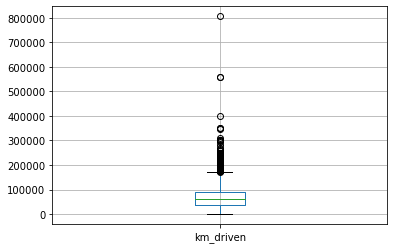

In [7]:
#Lets plot the box plot to check the outliers of km driven
df.boxplot(column='km_driven')
plt.show()

**We can clearly see that only 3 values are present above 5 lacs.we need to remove that outliers**

In [8]:
##check the rows of outliers
df[df['km_driven']>500000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner


In [9]:
# drop the rows of outliers
df=df[df['km_driven']<500000].reset_index(drop=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4332,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4333,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4334,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4335,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [10]:
#let's check how many values lies in the selling_price more than 6 lacs 
df[df['selling_price']>6e6]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3870,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner


**Only 2 values this could cause the data to maybe fit to the wrong values and might not work with new data.**

In [11]:
#Lets remove the rows of outliers
df=df[df['selling_price']<6e6].reset_index(drop=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4330,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4331,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4332,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4333,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


**As now we can see the shape of the data is 4335x8  that means total 5 rows of outlirs are deleted**

In [12]:
# Find unique values 
print("Fuel unique values: ", df['fuel'].unique())

print("seller_type unique values: ", df['seller_type'].unique())

print("transmission unique values: ", df['transmission'].unique())

print("owner unique values: ", df['owner'].unique())

Fuel unique values:  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type unique values:  ['Individual' 'Dealer' 'Trustmark Dealer']
transmission unique values:  ['Manual' 'Automatic']
owner unique values:  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [13]:
# make a column of car age
df['car_age'] = 2022 - df['year']
df['car_age'] 

0       15
1       15
2       10
3        5
4        8
        ..
4330     8
4331     8
4332    13
4333     6
4334     6
Name: car_age, Length: 4335, dtype: int64

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [15]:
# There is no need of year column, drop that column:

df.drop('year', inplace=True, axis=1)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8


### Exploratory data analysis

In [16]:
# Plot the graph

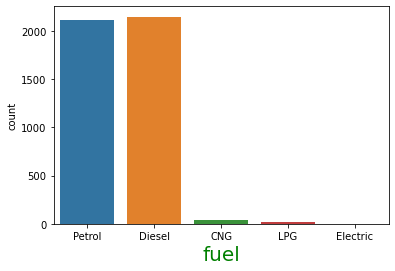

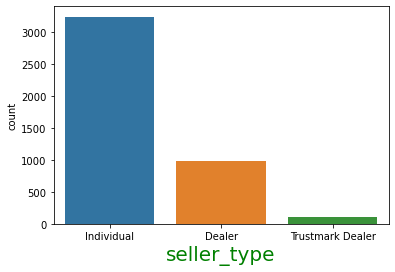

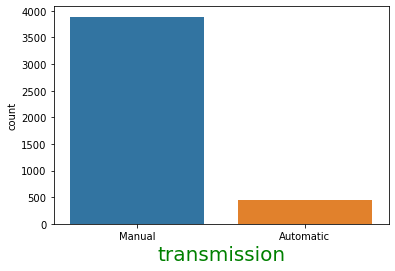

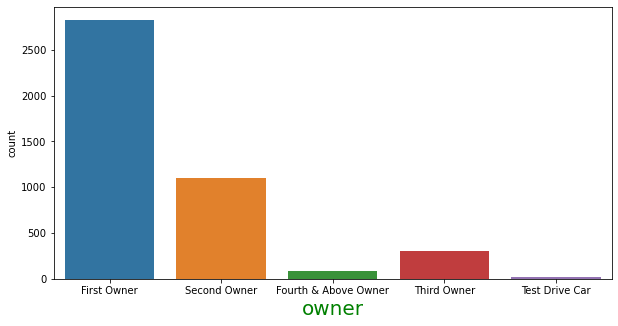

In [17]:
sns.countplot(x='fuel', data=df)
plt.xlabel('fuel', fontdict={'fontsize':20, 'color':'Green'})
plt.show()

sns.countplot(x='seller_type', data=df)
plt.xlabel('seller_type', fontdict={'fontsize':20, 'color':'Green'})
plt.show()

sns.countplot(x='transmission', data=df)
plt.xlabel('transmission', fontdict={'fontsize':20, 'color':'Green'})
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='owner', data=df)
plt.xlabel('owner', fontdict={'fontsize':20, 'color':'Green'})
plt.show()

- Inference:
    - Majority of car use Petrol and Diesel as fuel
    - individual seller are more than other seller.
    - majority of vehicle transmission is mannual.
    - First owners are more who want to sell the car.

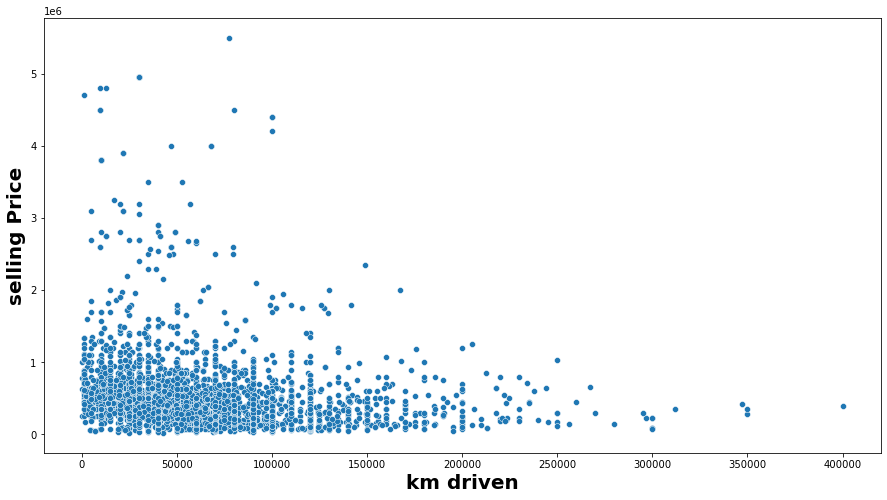

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = df, x = "km_driven", y = "selling_price")
plt.xlabel("km driven", fontdict={'fontsize':20, 'color':'Black', 'fontweight':'bold'})
plt.ylabel("selling Price", fontdict={'fontsize':20, 'color':'Black', 'fontweight':'bold'})
plt.show()

- Inference: Selling Price is inversly propotional to distance travelled by a vehicle.

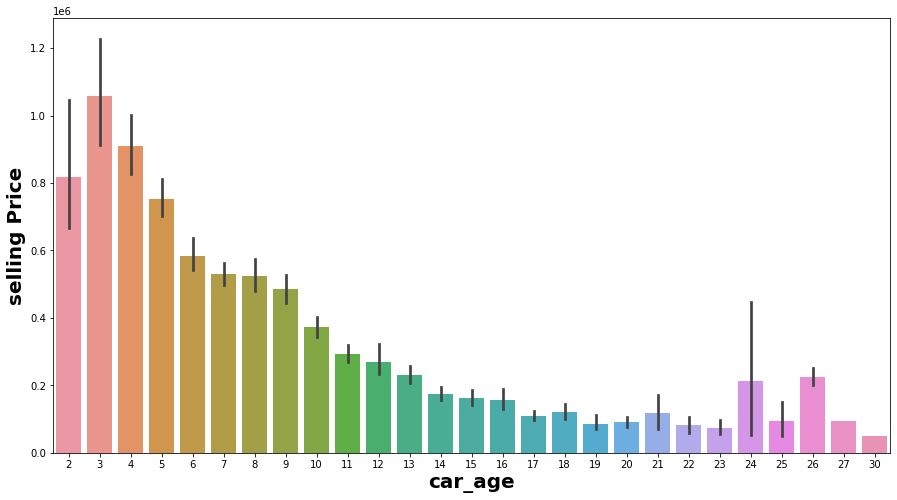

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = "car_age", y = "selling_price")
plt.xlabel("car_age", fontdict={'fontsize':20, 'color':'Black', 'fontweight':'bold'})
plt.ylabel("selling Price", fontdict={'fontsize':20, 'color':'Black', 'fontweight':'bold'})
plt.show()

- Inference: Selling Price is inversly propotional to the age of vehicle.

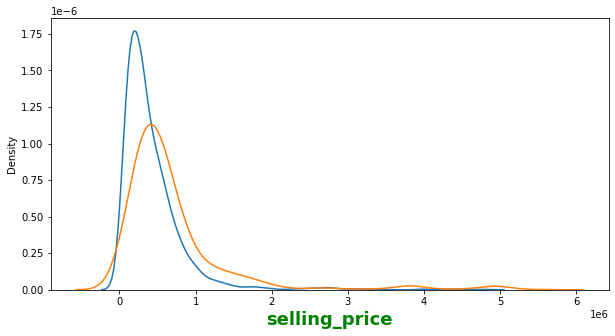

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['seller_type']=='Individual']['selling_price'],hist=False)
sns.distplot(df[df['seller_type']=='Dealer']['selling_price'],hist=False)
plt.xlabel("selling_price", fontdict={'fontsize':18, 'color':'green', 'fontweight':'bold'})

plt.show()

- Inference: From the above graph we can say that the density of individual seller_type is more than dealer.

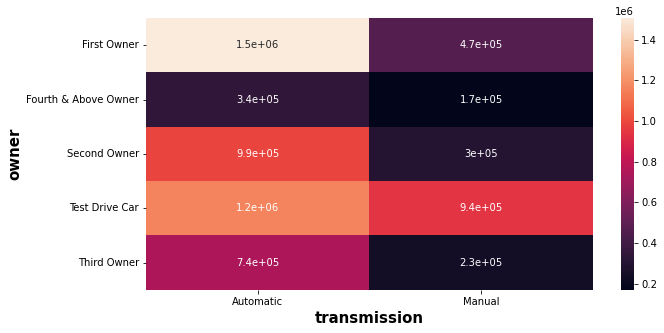

In [21]:
df_1 =df.pivot_table(values='selling_price',index='owner',columns='transmission')
plt.figure(figsize=(10,5))
sns.heatmap(df_1,annot= True)
plt.xlabel("transmission", fontdict={'fontsize':15, 'color':'Black', 'fontweight':'bold'})
plt.ylabel("owner", fontdict={'fontsize':15, 'color':'Black', 'fontweight':'bold'})
plt.show()

- Inference :automatic & first owner has higher prices  and manual & Fourth and above owners have least price. 

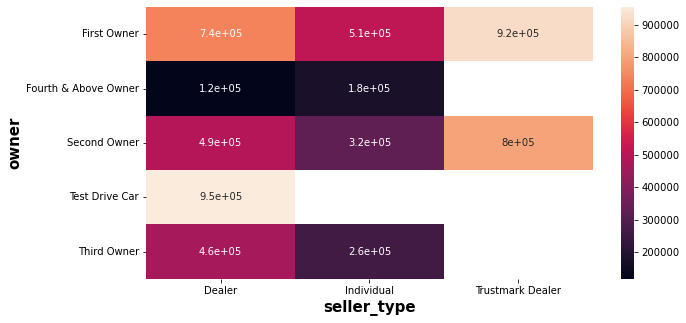

In [22]:
df_2=df.pivot_table(values='selling_price',index='owner',columns='seller_type')
plt.figure(figsize=(10,5))
sns.heatmap(df_2,annot= True)
plt.xlabel("seller_type", fontdict={'fontsize':15, 'color':'Black', 'fontweight':'bold'})
plt.ylabel("owner", fontdict={'fontsize':15, 'color':'Black', 'fontweight':'bold'})
plt.show()

- Inference :
        1)we can clearly see from the above map that, trustmark dealer has more price than individual and dealer.
        2)Test drive car has high price in every seller type
        3)for dealer and individual only fourth & above owner car price is low

In [23]:
# encode the categorical variable columns:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

df.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

df.replace({'owner':{"Test Drive Car":0,"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4}},inplace=True)

df.rename(columns={'transmission':'is_automatic'}, inplace=True)
df.replace({'is_automatic':{'Manual':0,'Automatic':1}},inplace=True)

In [24]:
# Let's check the replacement
df.head()

,name,selling_price,km_driven,fuel,seller_type,is_automatic,owner,car_age
0,Maruti 800 AC,60000,70000,0,1,0,1,15
1,Maruti Wagon R LXI Minor,135000,50000,0,1,0,1,15
2,Hyundai Verna 1.6 SX,600000,100000,1,1,0,1,10
3,Datsun RediGO T Option,250000,46000,0,1,0,1,5
4,Honda Amaze VX i-DTEC,450000,141000,1,1,0,2,8


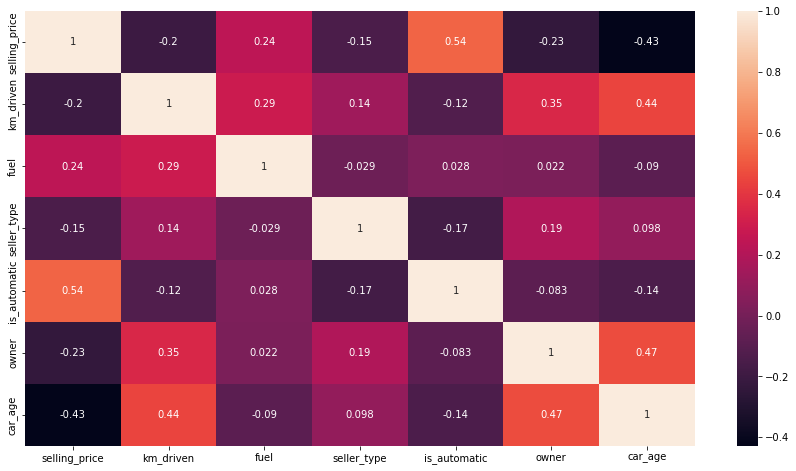

In [25]:
# Check the correlation of variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True)
plt.show()

- Inference: There is high inverse correlation between
    - selling price and car age
    - selling price and owner
    - selling price and km driven
- https://www.investopedia.com/terms/i/inverse-correlation.asp

In [26]:
# shorten the length of name of car to get some uniformity.
df['name']=df['name'].str.split().str.slice(0,3).str.join(' ')
df['name']

0           Maruti 800 AC
1          Maruti Wagon R
2       Hyundai Verna 1.6
3         Datsun RediGO T
4          Honda Amaze VX
              ...        
4330    Hyundai i20 Magna
4331    Hyundai i20 Magna
4332        Maruti 800 AC
4333    Hyundai Creta 1.6
4334     Renault KWID RXT
Name: name, Length: 4335, dtype: object

### Model Building

In [27]:
# split the data into X and Y
X=df.drop(columns='selling_price')
Y=df['selling_price']

In [28]:
# import necessary liberaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler


In [29]:
# manage the categorical data using one hot encoder
ohe=OneHotEncoder()
ohe.fit(X[['name','fuel','seller_type','is_automatic','owner']])

OneHotEncoder()

In [30]:
col_transform=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','is_automatic','owner']),remainder='passthrough')

In [31]:
#  run a loop for different values of the parameter to see which value gives least error
scores=[]
for i in range(100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    reg=LinearRegression()
    pipe=make_pipeline(col_transform,reg)
    pipe.fit(X_train,Y_train)
    y_pred=pipe.predict(X_test)
    error=mean_squared_error(Y_test,y_pred)
    rmse=np.sqrt(error)
    scores.append(rmse)

In [32]:
min(scores)

154390.24623324108

In [33]:
scores.index(min(scores))

61

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=61)
reg=LinearRegression()
pipe=make_pipeline(col_transform,reg)
pipe.fit(X_train,Y_train)
y_pred=pipe.predict(X_test)
error=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(error)

In [35]:
rmse

154390.24623324108

In [36]:
pipe.predict(pd.DataFrame([['Datsun RediGO T',46000,0,1,0,1,5]],columns=['name','km_driven','fuel','seller_type','is_automatic','owner','car_age']))

array([230069.18914854])

- predicted price : 230069
- Expected price is 250000

- The difference in predicted price and expected price is due to the less accuracy of model
- from the observation it seems that decision tree regression give better accuracy to the model than linear regression

**I apply Linear Regression algorithm to this model for assignment purpose only.**